<h3 style = "color : Brown">Import Libraries</h3>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
from sklearn.impute import SimpleImputer
#Feature Engineering
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

#To supress warnings
import warnings
warnings.filterwarnings('ignore')

import os

<h3 style = "color : Brown">Load and explore Data</h3>

In [2]:
# read data
df = pd.read_csv('train (1).csv')

In [3]:
# look at initial rows of the data
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
# feature type summary
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
# look at data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


In [6]:
#check shape of data
df.shape

(69999, 172)

In [7]:
# Let's drop id,date columns and the columns with all zeros ;as these seem to provide no significant info
df = df.drop(['id','circle_id',
              'loc_og_t2o_mou',
              'std_og_t2o_mou',
              'loc_ic_t2o_mou',
              'std_og_t2c_mou_6',
              'std_og_t2c_mou_7',
              'std_og_t2c_mou_8',
              'std_ic_t2o_mou_6',
              'std_ic_t2o_mou_7',
              'std_ic_t2o_mou_8',
             'last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'], axis=1)
print("Shape after dropping: ", df.shape)

Shape after dropping:  (69999, 152)


<h1 style = "color : Brown">Checking and Handling missing values</h1>

In [8]:
# Check missing values
df.isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

In [9]:
# look at total missing value ratio 
percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
percent_null

15.53207339052212

In [10]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t2t_mou_6       3.954342
std_og_t

<h3 style = "color : Brown">Impute missing values</h3>

<h4 style = "color : Brown">Imputing with Zeros</h4>

In [11]:
#Let's observe the recharge data and treat it for missing values
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [12]:
# check recharge amount and recahrge data
df.loc[df.total_rech_data_6.isnull() & (df.total_rech_amt_6==0), ["total_rech_data_6", "total_rech_amt_6"]].head(20)

,total_rech_data_6,total_rech_amt_6
1,NaN,0
26,NaN,0
28,NaN,0
51,NaN,0
59,NaN,0
66,NaN,0
69,NaN,0
91,NaN,0
95,NaN,0
101,NaN,0


- It is  observed that when the recharge value is missing then the total recharge amount is 0. It means the customer didn't recharge.
- Hence we will impute these missing values with 0

In [13]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       ]

In [14]:
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [15]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(df[zero_impute].isnull().sum()*100/df.shape[1])

# summary
print("\n\nSummary statistics\n")
print(df[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [16]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t2t_mou_6       3.954342
std_og_t

<h3 style = "color : Brown">Treat Missing Values for categorical Variables</h3>

- Values represent a particular catgory. To represent the unknown category let's fill with -1.

In [17]:
# Convert data type of Categorical Target variable
df['churn_probability'] = df['churn_probability'].astype('category')
df['churn_probability'].dtypes
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 152 columns):
 #    Column              Dtype   
---   ------              -----   
 0    arpu_6              float64 
 1    arpu_7              float64 
 2    arpu_8              float64 
 3    onnet_mou_6         float64 
 4    onnet_mou_7         float64 
 5    onnet_mou_8         float64 
 6    offnet_mou_6        float64 
 7    offnet_mou_7        float64 
 8    offnet_mou_8        float64 
 9    roam_ic_mou_6       float64 
 10   roam_ic_mou_7       float64 
 11   roam_ic_mou_8       float64 
 12   roam_og_mou_6       float64 
 13   roam_og_mou_7       float64 
 14   roam_og_mou_8       float64 
 15   loc_og_t2t_mou_6    float64 
 16   loc_og_t2t_mou_7    float64 
 17   loc_og_t2t_mou_8    float64 
 18   loc_og_t2m_mou_6    float64 
 19   loc_og_t2m_mou_7    float64 
 20   loc_og_t2m_mou_8    float64 
 21   loc_og_t2f_mou_6    float64 
 22   loc_og_t2f_mou_7    float64 
 23   loc_og_t2

In [18]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
             ]

In [19]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [20]:
cat_cols.append('churn_probability')
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

In [21]:
# missing value ratio
print("Missing value ratio:\n")
print(df[cat_cols].isnull().sum()*100/df.shape[0])

Missing value ratio:

night_pck_user_6     0.0
night_pck_user_7     0.0
night_pck_user_8     0.0
fb_user_6            0.0
fb_user_7            0.0
fb_user_8            0.0
churn_probability    0.0
dtype: float64


<h3 style = "color : Brown">Drop variables with more than a given threshold of missing values</h3>

In [22]:
#Setting Threshold
MISSING_THRESHOLD = 0.7

In [23]:
#store initial Shape
initial_cols = df.shape[1]
initial_cols

152

In [24]:
#Get Columns having lesser missing values than Threshold
include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

In [25]:
#Filtering fetaures
drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,arpu_6,True
1,arpu_7,True
2,arpu_8,True
3,onnet_mou_6,True
4,onnet_mou_7,True
5,onnet_mou_8,True
6,offnet_mou_6,True
7,offnet_mou_7,True
8,offnet_mou_8,True
9,roam_ic_mou_6,True


In [26]:
# drop columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-12 columns dropped.


In [27]:
#Get Numerical columns
num_cols = [column for column in df.columns if column not in cat_cols]
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [28]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.90485

In [29]:
# Imputing missing values for rest of the columns
impute = SimpleImputer(missing_values=np.nan,strategy ='median')
df[num_cols] = impute.fit_transform(df[num_cols])

In [30]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000
mean,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038

In [31]:
df.isna().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

In [32]:
percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
percent_null

0.0

In [33]:
df.shape

(69999, 140)

<h1 style = "color : Brown">Visualise data</h1>

In [34]:
# change columns types
df[num_cols] = df[num_cols].apply(pd.to_numeric)
df[cat_cols] = df[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [35]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical variable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)
    else:
        print("Invalid variable passed.")

<h1 style = "color : Purple">Univariate EDA</h1>


In [36]:
#Find % of Churn customers
ChurnPercentage=round((df['churn_probability'].count()-df.churn_probability[df['churn_probability']==0].count())*100/df['churn_probability'].count())
NotChurnPercentage=100-ChurnPercentage
print('Percentage of Churn Customers:{0}%'.format(ChurnPercentage))


Percentage of Churn Customers:10%


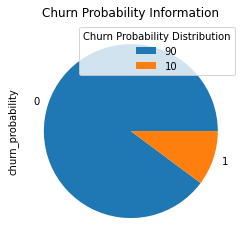

In [37]:
#Plot a pie chart to see the churn distribution
perc=[NotChurnPercentage,ChurnPercentage]
df['churn_probability'].value_counts().plot.pie()
plt.title('Churn Probability Information')
plt.legend(perc,title="Churn Probability Distribution",loc='upper right')
plt.show()

- 10 % of customers in the available data have tendecy to Churn.

<h3 style = "color : Purple">Filter high-value customers</h3>

In [38]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [39]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [40]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2
df['av_amt_data_6_7'].value_counts()

0.00       2202
55.00      1049
110.00      775
100.00      730
60.00       724
           ... 
1509.00       1
2432.00       1
2044.50       1
1701.25       1
3515.00       1
Name: av_amt_data_6_7, Length: 5453, dtype: int64

In [41]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [42]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(21013, 145)

In [43]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(21013, 140)

In [44]:
# delete variables from original df created to filter high-value customers
df = df.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df.shape

(69999, 140)

<h4 style = "color : Blue">Let's Check Churn probability distribution after filtering high value customers</h4>

In [45]:
#Find % of Churn customers
NotChurnPercentage=round((churn_filtered['churn_probability'].count()-churn_filtered.churn_probability[df['churn_probability']==1].count())*100/churn_filtered['churn_probability'].count())
ChurnPercentage=100-NotChurnPercentage
print('Percentage of Churn Customers:{0}%'.format(ChurnPercentage))


Percentage of Churn Customers:10%


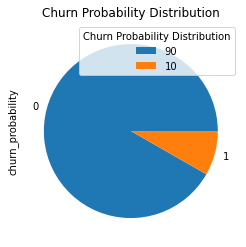

In [46]:
#Plot a pie chart to see the churn distribution
perc=[NotChurnPercentage,ChurnPercentage]
churn_filtered['churn_probability'].value_counts().plot.pie()
plt.title('Churn Probability Distribution')
plt.legend(perc,title="Churn Probability Distribution",loc='upper right')
plt.show()

<h4 style = "color : Purple">Analysis of the average revenue per customer</h4>

count    21013.000000
mean       558.458938
std        474.147345
min      -2258.709000
25%        307.718000
50%        482.616000
75%        700.552000
max      27731.088000
Name: arpu_6, dtype: float64


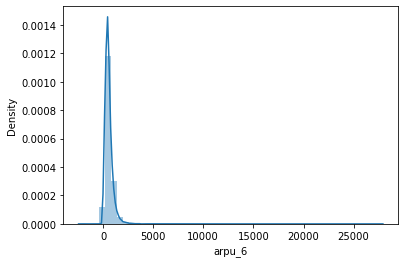

In [47]:
univariate(churn_filtered.arpu_6)

count    21013.000000
mean       558.729577
std        494.844437
min      -1289.715000
25%        308.673000
50%        479.725000
75%        697.076000
max      35145.834000
Name: arpu_7, dtype: float64


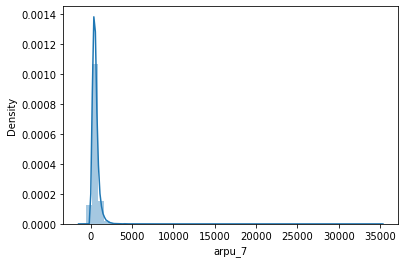

In [48]:
univariate(churn_filtered.arpu_7)

count    21013.000000
mean       506.861525
std        519.951307
min       -945.808000
25%        230.471000
50%        427.575000
75%        658.704000
max      33543.624000
Name: arpu_8, dtype: float64


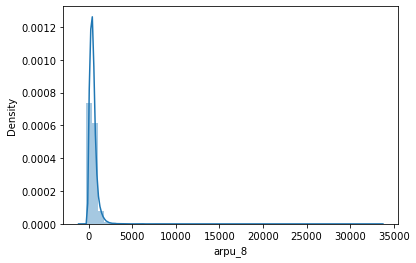

In [49]:
univariate(churn_filtered.arpu_8)

<h4 style = "color : Purple">Analysis of the Customer On Net and Off net in June , July and August month</h4>

count    21013.000000
mean       263.196803
std        464.159980
min          0.000000
25%         20.040000
50%         84.860000
75%        289.360000
max       7376.710000
Name: onnet_mou_6, dtype: float64


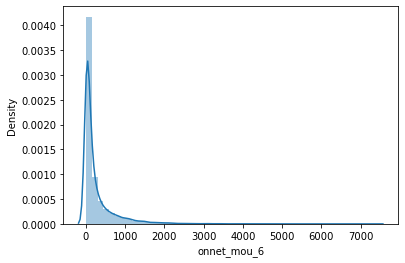

In [50]:
univariate(churn_filtered.onnet_mou_6)

count    21013.000000
mean       378.131889
std        480.151224
min          0.000000
25%         81.610000
50%        224.080000
75%        492.910000
max       8362.360000
Name: offnet_mou_6, dtype: float64


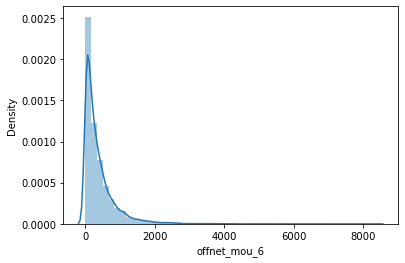

In [51]:
univariate(churn_filtered.offnet_mou_6)

count    21013.000000
mean       268.555904
std        485.800514
min          0.000000
25%         18.790000
50%         82.310000
75%        288.730000
max       8157.780000
Name: onnet_mou_7, dtype: float64


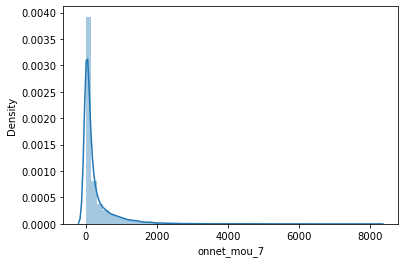

In [52]:
univariate(churn_filtered.onnet_mou_7)

count    21013.000000
mean       379.512377
std        490.731584
min          0.000000
25%         78.710000
50%        219.430000
75%        496.810000
max       7043.980000
Name: offnet_mou_7, dtype: float64


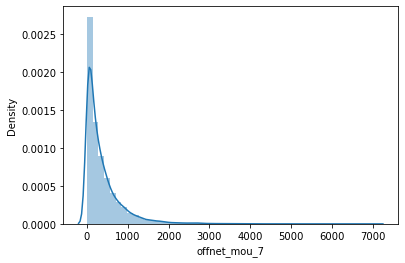

In [53]:
univariate(churn_filtered.offnet_mou_7)

count    21013.000000
mean       235.456107
std        464.163130
min          0.000000
25%         15.330000
50%         65.340000
75%        238.040000
max      10752.560000
Name: onnet_mou_8, dtype: float64


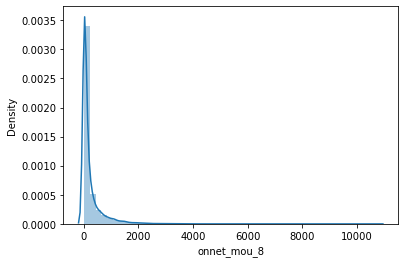

In [54]:
univariate(churn_filtered.onnet_mou_8)

count    21013.000000
mean       338.603022
std        474.806533
min          0.000000
25%         63.310000
50%        183.360000
75%        436.840000
max      14007.340000
Name: offnet_mou_8, dtype: float64


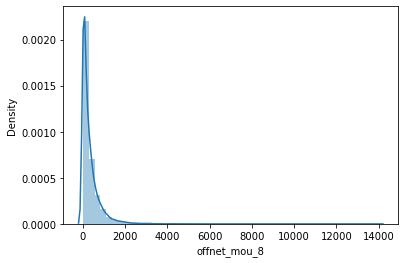

In [55]:
univariate(churn_filtered.offnet_mou_8)

<h4 style = "color : Purple"> Age on network  - For Churn and Non Churn Customer</h4>

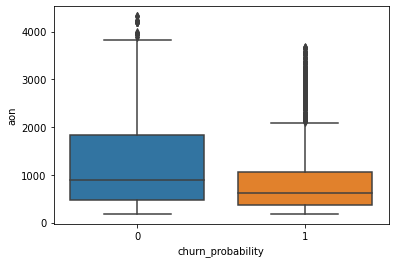

In [56]:
bivariate(churn_filtered.churn_probability, churn_filtered.aon)

<h4 style = "color : Purple"> Total Num of rechargs  - For Churn and Non Churn Customer</h4>

In [57]:
# Total Recharge times
churn_filtered['TotalNumOfRechargs']=churn_filtered['total_rech_num_6']+churn_filtered['total_rech_num_7']+churn_filtered['total_rech_num_8']
churn_filtered['TotalNumOfRechargs']

0        31.0
1        12.0
2        55.0
3        24.0
4        25.0
         ... 
21008    14.0
21009    19.0
21010    41.0
21011    31.0
21012    10.0
Name: TotalNumOfRechargs, Length: 21013, dtype: float64

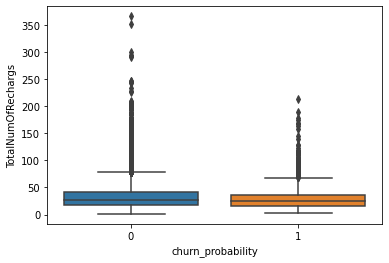

In [58]:
bivariate(churn_filtered.churn_probability, churn_filtered['TotalNumOfRechargs'])

<h4 style = "color : Purple"> Total recharge Amount  - For Churn and Non Churn Customer</h4>

In [59]:
# Total Recharge amount
churn_filtered['TotalAmtRechargs']=churn_filtered['total_rech_amt_6']+churn_filtered['total_rech_amt_7']+churn_filtered['total_rech_amt_8']
churn_filtered['TotalAmtRechargs']

0         548.0
1        1706.0
2        2904.0
3        1107.0
4        1387.0
          ...  
21008    4746.0
21009     837.0
21010     612.0
21011     959.0
21012     776.0
Name: TotalAmtRechargs, Length: 21013, dtype: float64

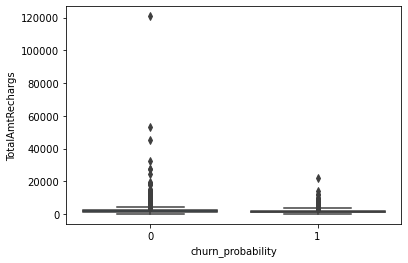

In [60]:
bivariate(churn_filtered.churn_probability, churn_filtered['TotalAmtRechargs'])

<h3 style = "color : Brown">Observations</h3>

- 1. Most of the dat is Right Skewed. hence we Need to identify and cap outliers.
- 2. Churn probability is high for users with less Average age on network
- 3. Churn probability does not seem to be impacted by total recharge amount and total number of recharges.


In [61]:
#drop temp columns added 
churn_filtered = churn_filtered.drop(['TotalAmtRechargs','TotalNumOfRechargs'], axis=1)
churn_filtered

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.00,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,647.0,0.00,0.00,0.00,0
1,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.00,0.00,0.0,0.00,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.00,0.00,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.26,0.00,0.00,6.26,0.00,0.00,0.00,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.03,0.00,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5.0,3.0,4.0,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.00,0.00,0.00,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,602.0,0.00,0.00,0.00,0
2,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.00,0.00,0.0,0.00,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.00,0.00,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.00,0.00,0.00,202.08,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.0,207.03,0.00,0.00,0.00,0.00,0.00,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.00,0.0,0.00,0.00,

### Cap outliers in all numeric variables with k-sigma technique

In [62]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [63]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [64]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

<h2 style = "color : Purple"> Checking Correlation</h2>

In [65]:
#Numeric columns for June
num_colsForJune = [column for column in num_cols if column.endswith('6')]


In [66]:
#Numeric columns for July
num_colsForJuly = [column for column in num_cols if column.endswith('7')]

In [67]:
#Numeric columns for August
num_colsForAug = [column for column in num_cols if column.endswith('8')]

In [68]:
#Numeric columns independent of Month
num_colsOthers =['aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']

In [69]:
# Function to plot heat map to see correlation between some continous variables
def plotheatmap(cols):
    Data_corr = churn_filtered[cols].corr()
    plt.figure(figsize = (18, 20))
    sns.heatmap(Data_corr, cmap="Greens",annot=True)
    plt.title("Correlation Plot")
    plt.show()

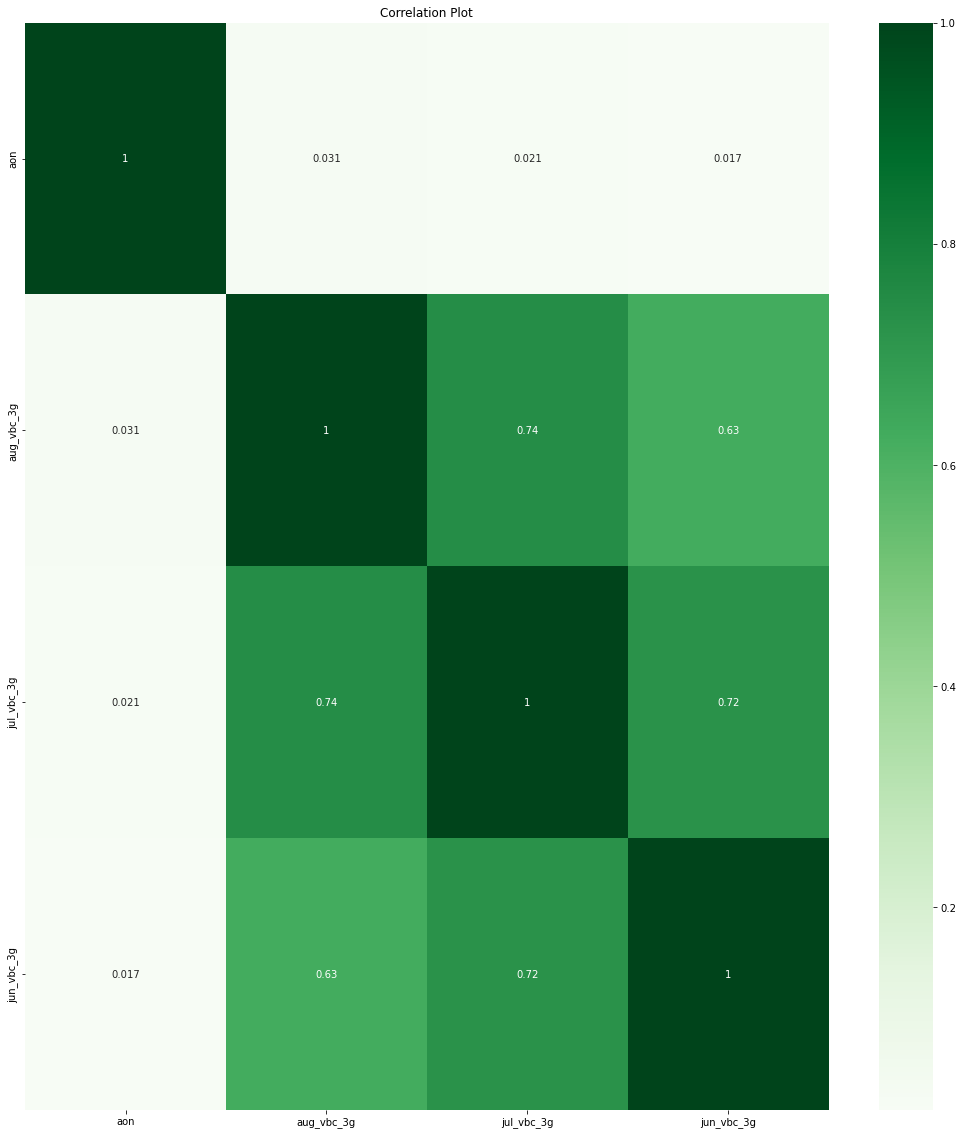

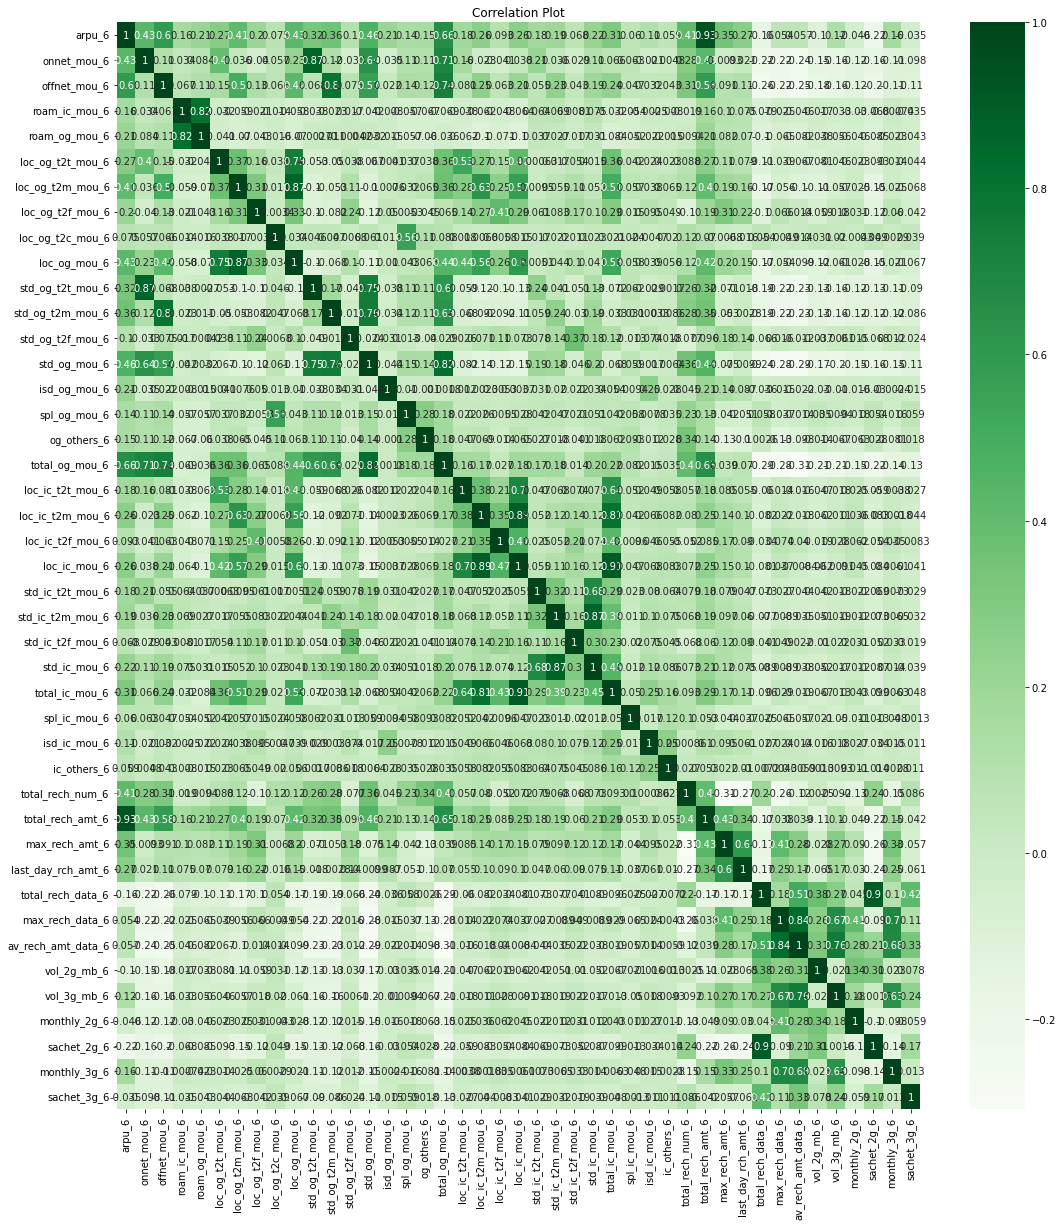

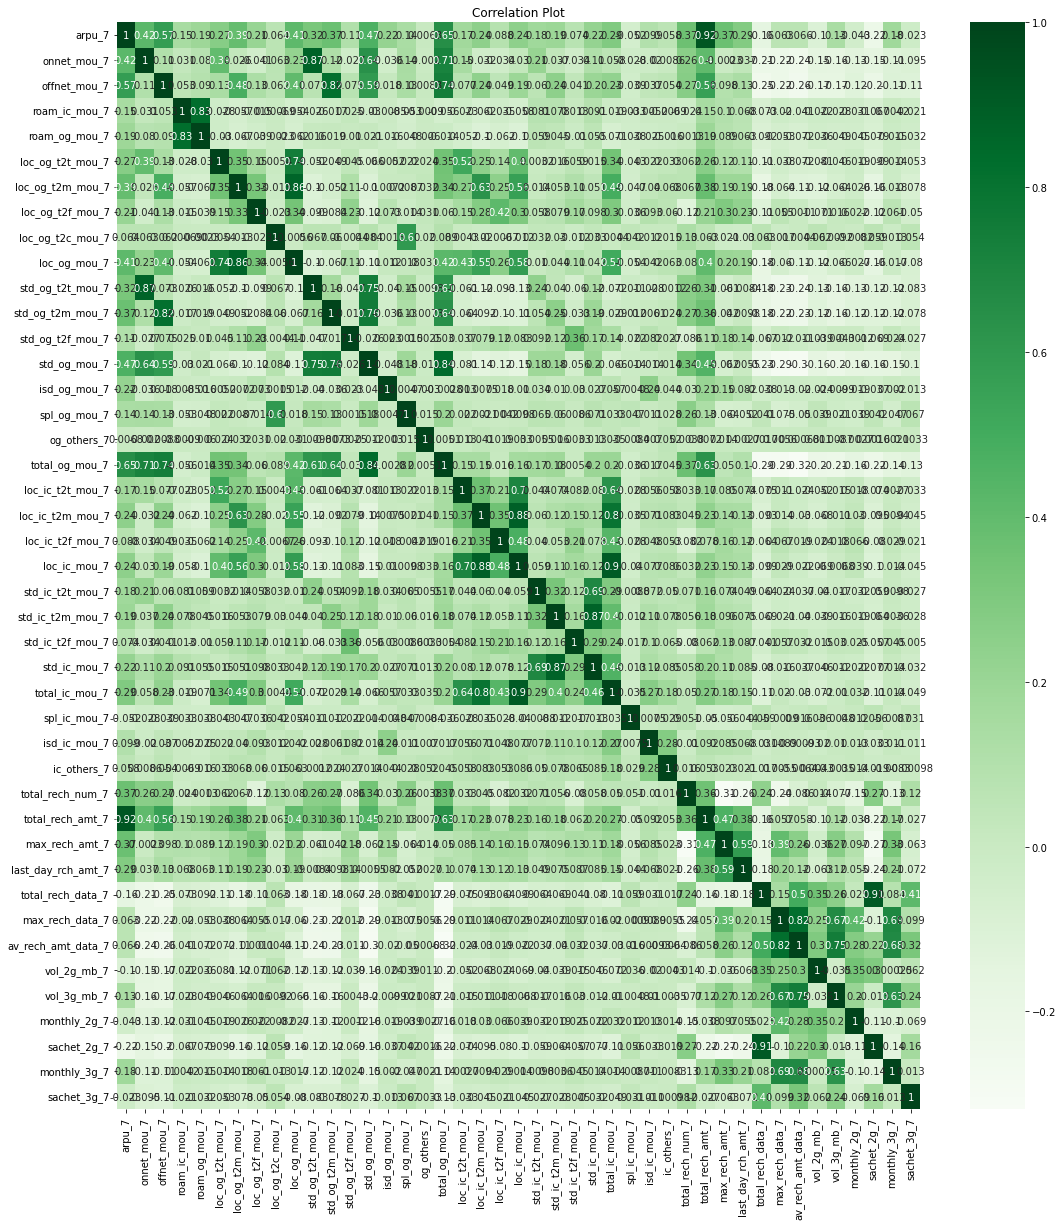

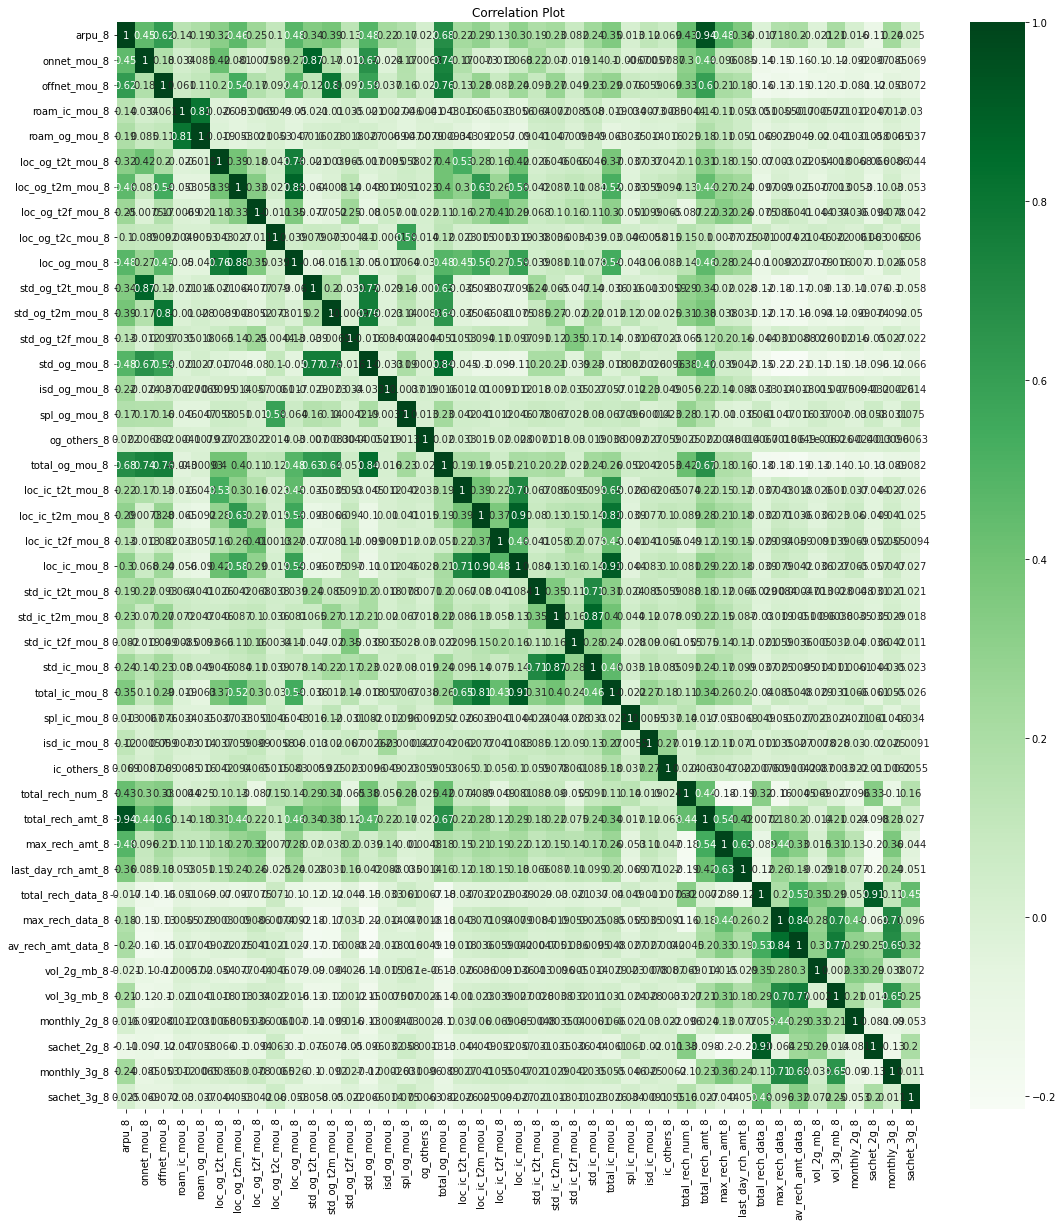

In [70]:
# Plot heat map to see correlation between some numeric variables
columnsSubsets=[num_colsOthers,num_colsForJune,num_colsForJuly,num_colsForAug]
for subset in columnsSubsets:
    plotheatmap(subset)

<h3 style = "color : Purple">Observations</h3>

- There seems lots of multicolienarity in the predictor variables.
- We need to handle this either by using PCA or the models which are not affected by multi colinearity.

<h1 style = "color : Orange">Test Data Preprocessing</h1>

In [71]:
#load test data from two different files.
test_df = pd.read_csv('test (1).csv')
sol_df = pd.read_csv('solution (1).csv')


In [72]:
#Inspect the data
sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [73]:
# Extract y_test values from Sol_df
y_test=sol_df['churn_probability']

In [74]:
#Inspect Test data 
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [75]:
test_df.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [76]:
# Let's drop id,date columns and the columns with all zeros ;as these seem to provide no significant info
test_df = test_df.drop(['id','circle_id',
              'loc_og_t2o_mou',
              'std_og_t2o_mou',
              'loc_ic_t2o_mou',
              'std_og_t2c_mou_6',
              'std_og_t2c_mou_7',
              'std_og_t2c_mou_8',
              'std_ic_t2o_mou_6',
              'std_ic_t2o_mou_7',
              'std_ic_t2o_mou_8',
             'last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'], axis=1)
print("Shape after dropping: ", test_df.shape)

Shape after dropping:  (30000, 151)


In [77]:
# impute missing values with 0
test_df[zero_impute] = test_df[zero_impute].apply(lambda x: x.fillna(0))

In [78]:
cat_cols.remove('churn_probability')
# replace missing values with '-1' in categorical columns
test_df[cat_cols] = test_df[cat_cols].apply(lambda x: x.fillna(-1))

In [79]:
#Dropping same columns from test data as train data
include_cols.pop(-1)
test_df = test_df.loc[:, include_cols]
dropped_cols = test_df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-13 columns dropped.


In [80]:
test_df.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6           1169
onnet_mou_7           1172
onnet_mou_8           1675
offnet_mou_6          1169
offnet_mou_7          1172
offnet_mou_8          1675
roam_ic_mou_6         1169
roam_ic_mou_7         1172
roam_ic_mou_8         1675
roam_og_mou_6         1169
roam_og_mou_7         1172
roam_og_mou_8         1675
loc_og_t2t_mou_6      1169
loc_og_t2t_mou_7      1172
loc_og_t2t_mou_8      1675
loc_og_t2m_mou_6      1169
loc_og_t2m_mou_7      1172
loc_og_t2m_mou_8      1675
loc_og_t2f_mou_6      1169
loc_og_t2f_mou_7      1172
loc_og_t2f_mou_8      1675
loc_og_t2c_mou_6      1169
loc_og_t2c_mou_7      1172
loc_og_t2c_mou_8      1675
loc_og_mou_6          1169
loc_og_mou_7          1172
loc_og_mou_8          1675
std_og_t2t_mou_6      1169
std_og_t2t_mou_7      1172
std_og_t2t_mou_8      1675
std_og_t2m_mou_6      1169
std_og_t2m_mou_7      1172
std_og_t2m_mou_8      1675
std_og_t2f_mou_6      1169
s

In [81]:
percent_null = test_df.isnull().sum().sum() / np.product(test_df.shape) * 100
percent_null

2.6002877697841726

In [82]:
# Imputing missing values for rest of the columns
test_df[num_cols] = impute.transform(test_df[num_cols])

In [83]:
percent_null = test_df.isnull().sum().sum() / np.product(test_df.shape) * 100
percent_null

0.0

In [84]:
# cap outliers in the numeric columns
test_df[num_cols] = test_df[num_cols].apply(cap_outliers, axis=0)

In [85]:
# Assigning test data to X_test variable
X_test=test_df

In [86]:
list(X_test.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

### Test data is also cleaned now same as train data

<h1 style = "color : Orange">Building Model</h1>

In [87]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [88]:
#Copy whole data in filtered Df
churn_filtered=df
churn_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2.0,4.0,2.0,70.0,120.0,0.0,70.0,70.0,0.0,70.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0.0,

In [89]:
# cap outliers in the numeric columns
churn_filtered[num_cols] = churn_filtered[num_cols].apply(cap_outliers, axis=0)

In [90]:
# change churn to numeric
churn_filtered['churn_probability'] = pd.to_numeric(churn_filtered['churn_probability'])


In [91]:
# aggregate the categorical variables
for cat in cat_cols:
    if cat is not 'churn_probability':
        grouped=churn_filtered.groupby(cat).churn_probability.mean()
        print(grouped)
 

night_pck_user_6
-1.0    0.107208
0.0     0.085027
1.0     0.123874
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.114340
0.0     0.065558
1.0     0.065116
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.126246
0.0     0.033722
1.0     0.031008
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.107208
0.0     0.109524
1.0     0.083861
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.114340
0.0     0.086015
1.0     0.063512
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.126246
0.0     0.066337
1.0     0.029640
Name: churn_probability, dtype: float64


In [92]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099925, 0: 0.068104, 1: 0.108303},
           'night_pck_user_7' : {-1: 0.117000, 0: 0.056505, 1: 0.062044},
           'night_pck_user_8' : {-1: 0.142276, 0: 0.030439, 1: 0.029167},
           'fb_user_6'        : {-1: 0.099925, 0: 0.080432, 1: 0.068184},
           'fb_user_7'        : {-1: 0.117000, 0: 0.070099, 1: 0.055515},
           'fb_user_8'        : {-1: 0.142276, 0: 0.076923, 1: 0.024975}
          }
churn_filtered.replace(mapping, inplace = True)


In [97]:
# Separate the predictors and Target variable
X_train = churn_filtered.drop('churn_probability', axis = 1)
y_train = churn_filtered.churn_probability

<h3 style = "color : Purple">PCA Model- To Explore Feature Variance</h3>

In [ ]:
# create pipeline  for standard scaling and pca 
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [ ]:
# Apply pipeline on Train Data
pipe.fit(X_train)
pipe.fit_transform(X_train)

In [ ]:
# extract pca model from pipeline
pca = pipe.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

In [ ]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

- We see that 80 Fetures explain the 97% Variance

<h4 style = "color : Blue">Functions for Prediction and Evaluation </h4>

In [93]:
def cal_score(x_test=None,y_test=None,model=None,name=None):
    predictions = model.predict(x_test)
    labels=y_test
    matrix = confusion_matrix(predictions, labels)
    print(matrix)
    print('\n')

    f1 = f1_score(predictions, labels, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    classes=[False,True]
    print(classification_report(predictions, labels, labels=classes))
    
    confusion_matrix_plot(matrix = matrix,classes = classes,name = name)

In [94]:
def confusion_matrix_plot(matrix=None,classes=None,name='Logistic Regression'):
    plt.figure(figsize=(12,10))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    #plt.savefig('/kaggle/working/img1.png')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize = 15,fontweight = 3);
    ax.set_ylabel('True labels',fontsize = 15,fontweight = 3); 
    ax.set_title('Confusion Matrix of '+name,fontsize = 25,fontweight = 5); 
    ax.xaxis.set_ticklabels(classes); 
    ax.yaxis.set_ticklabels(classes[::-1]);
    plt.show()

<h4 style = "color : Blue">Test and train data Scaling</h4>

In [ ]:
#Extract Scaler from pipeline
ss = pipe.named_steps['scaler']
# Scale the train and test data
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## PCA and Logistic Regression

In [ ]:
# create pipeline
PCA_VARS = 80
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [ ]:
# fit model
lr=pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)


In [ ]:
# Calculate score on train data
cal_score(x_test=X_train,y_test=y_train,model=lr,name='Logistic Regression')

In [ ]:
# Calculate score on Test data
cal_score(x_test=X_test,y_test=y_test,model=lr,name='Logistic Regression')

#### Conclusion: Using PCA and Logistic Regression Model
- We got f1-score on train data 0.750 
- We got f1-score on test data 0.809
- This is not so good


### PCA and Logistic Regression with Hyperparameter tuning 

In [ ]:
# class imbalance
y_train.value_counts()/y_train.shape

- As data shows huge class imbalance , We need to use class balancing technique.
- The class weight is used to handle class imbalance - it adjusts the cost function

In [ ]:
# PCA
pca = PCA()

# logistic regression 
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60,80], 'logistic__C': [0.1,0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
modelLr = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
modelLr.fit(X_train, y_train)

In [ ]:
# cross validation results
pd.DataFrame(modelLr.cv_results_)

In [ ]:
# print best hyperparameters
print("Best AUC: ", modelLr.best_score_)
print("Best hyperparameters: ", modelLr.best_params_)

In [ ]:
# Calculate score on train data
cal_score(x_test=X_train,y_test=y_train,model=modelLr,name='PCA-Logistic Regression')

In [ ]:
# Calculate score on test data
cal_score(x_test=X_test,y_test=y_test,model=modelLr,name='PCA-Logistic Regression')

#### Conclusion: Using PCA and Hyperparameters Tuned Logistic Regression Model
- We got f1-score on train data 0.746
- We got f1-score on test data 0.790
- This is also not so good


<h4 style = "color : Blue">Tree Models</h4>

### RandomForestClassifier

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


[[62867     2]
 [    0  7130]]


F1 Score: 0.9999714299393768


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     62869
        True       1.00      1.00      1.00      7130

    accuracy                           1.00     69999
   macro avg       1.00      1.00      1.00     69999
weighted avg       1.00      1.00      1.00     69999



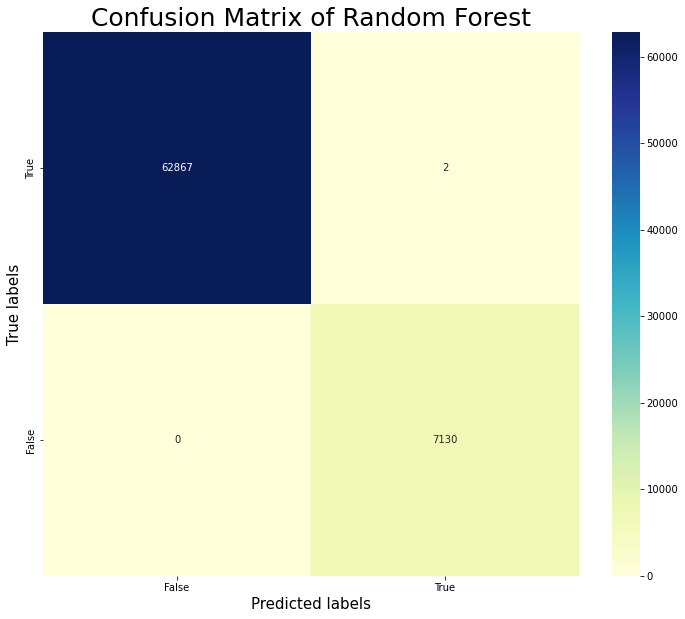

In [103]:
#RandomForestClassifier
modelRf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},oob_score=True,random_state=4, verbose=1)
modelRf.fit(X_train,y_train)
cal_score(x_test=X_train,y_test=y_train,model=modelRf,name='Random Forest')

In [ ]:
#calculate score on Test data
cal_score(x_test=X_test,y_test=y_test,model=modelRf,name='Random Forest')

In [ ]:
#Check out of bag error
modelRf.oob_score_

#### Conclusion: Using Random forest
- We got on train data F1 Score: 0.999
- We got on test data F1 Score: 0.944
- This seems good but model is overfitted on train data


### Random forest with hyperparameters tuned and Gridsearch CV

In [95]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['sqrt','auto','log2'],"max_depth":[10,20,30]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
modelRfTuned = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[[62111     5]
 [  756  7127]]


F1 Score: 0.988889198697309


              precision    recall  f1-score   support

       False       0.99      1.00      0.99     62116
        True       1.00      0.90      0.95      7883

    accuracy                           0.99     69999
   macro avg       0.99      0.95      0.97     69999
weighted avg       0.99      0.99      0.99     69999



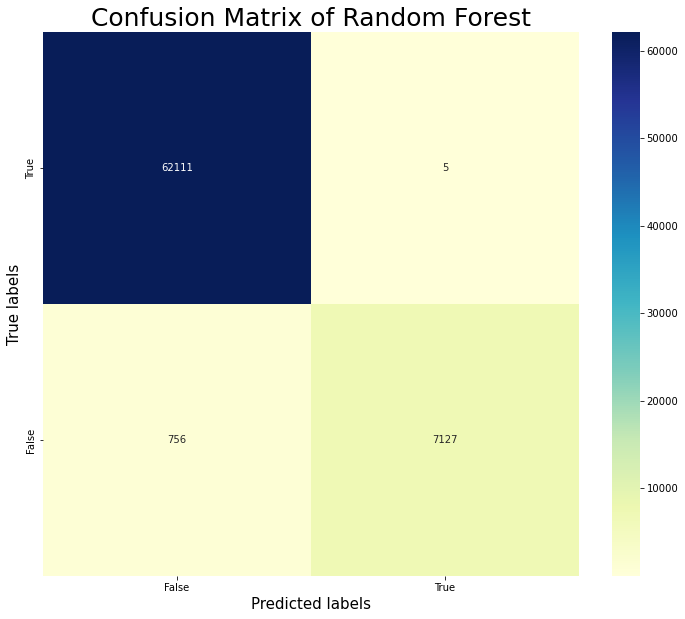

In [98]:
modelRfTuned.fit(X_train,y_train)
cal_score(x_test=X_train,y_test=y_train,model=modelRfTuned,name='Random Forest')

[[26449  1172]
 [  492  1887]]


F1 Score: 0.9476556375996621


              precision    recall  f1-score   support

       False       0.98      0.96      0.97     27621
        True       0.62      0.79      0.69      2379

    accuracy                           0.94     30000
   macro avg       0.80      0.88      0.83     30000
weighted avg       0.95      0.94      0.95     30000



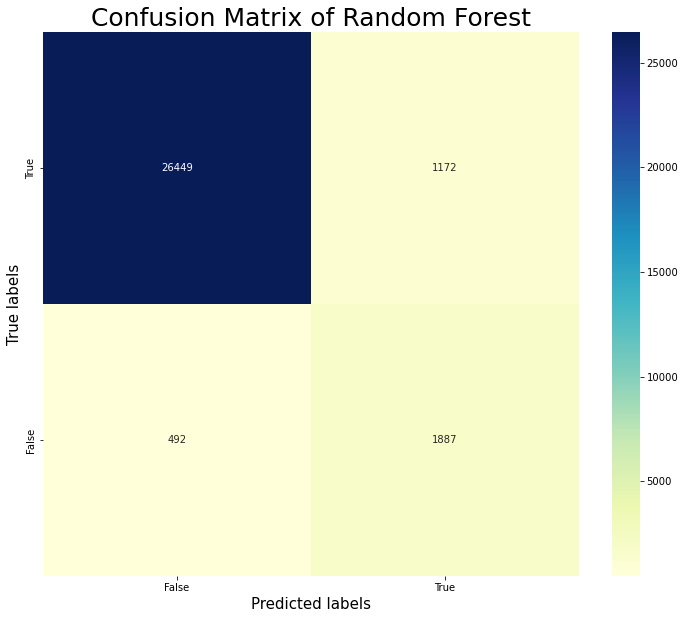

In [99]:
#calculate score on Test data
cal_score(x_test=X_test,y_test=y_test,model=modelRfTuned,name='Random Forest')

#### Conclusion: Using Hyperparameter Tuned Random forest
- We got on train data F1 Score: 0.989
- We got on test data F1 Score: 0.947



In [ ]:
modelRfTuned.best_params_

## ADABoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost =  AdaBoostClassifier(n_estimators=400, random_state=1)
adaboost.fit(X_train, y_train)
cal_score(x_test=X_train,y_test=y_train,model=adaboost,name='AdaBoost')

In [ ]:
# Calculate score with test data
cal_score(x_test=X_test,y_test=y_test,model=adaboost,name='AdaBoost')

### Conclusion: Using Adaboost
- We got on train data F1 Score: 0.943
- We got on test data F1 Score: 0.944
- This model so far shows least variance with test and train data

### GradientBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=400,random_state=100) # default 
gb.fit(X_train, y_train)
cal_score(x_test=X_train,y_test=y_train,model=gb,name='GDBoost')

In [ ]:
#calculate score for test data
cal_score(x_test=X_test,y_test=y_test,model=gb,name='GDBoost')

### Conclusion: Using GDboost
- We got on train data F1 Score: 0.952
- We got on test data F1 Score: 0.937
- This model so far shows very less variance with test and train data

### Predicting Churn probability for Test data

- We have recieved best score on test data with Regularised RandomForestClassifier model, Hence let's generate submission file with this model.

In [ ]:
probabilities = modelRfTuned.predict(X_test)

In [ ]:
probabilities.shape

In [ ]:
id=sol_df['id']

In [ ]:
submission = pd.DataFrame({'id':id,'churn_probability':probabilities})

In [ ]:
submission.to_csv('Submission1.csv',index=False)

### Feature Importance

In [104]:
# predictors
features = X_test.columns
features

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=139)

In [105]:

# feature_importance
importance = modelRf.feature_importances_
# # # create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# # sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,7.426666
1,total_og_mou_8,7.028435
2,total_rech_amt_8,4.464765
3,last_day_rch_amt_8,4.067873
4,loc_ic_mou_8,3.874154
5,loc_og_mou_8,3.360708
6,loc_ic_t2m_mou_8,3.132941
7,loc_og_t2m_mou_8,2.899833
8,arpu_8,2.727888
9,roam_og_mou_8,2.657352


### Extracting top 20 features

In [106]:
# extract top 'n' features
top_n = 20
top_features = feature_importance.variables[0:top_n]
top_features

0         total_ic_mou_8
1         total_og_mou_8
2       total_rech_amt_8
3     last_day_rch_amt_8
4           loc_ic_mou_8
5           loc_og_mou_8
6       loc_ic_t2m_mou_8
7       loc_og_t2m_mou_8
8                 arpu_8
9          roam_og_mou_8
10      loc_ic_t2f_mou_8
11         roam_ic_mou_8
12        max_rech_amt_8
13      loc_ic_t2t_mou_8
14      loc_og_t2t_mou_8
15        total_ic_mou_7
16          std_ic_mou_8
17          loc_ic_mou_7
18                   aon
19        total_og_mou_7
Name: variables, dtype: object

In [107]:
X_train_Top20=X_train[top_features]
X_test_Top20=X_test[top_features]


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[[59168   930]
 [ 3699  6202]]


F1 Score: 0.9292398246984892


              precision    recall  f1-score   support

       False       0.94      0.98      0.96     60098
        True       0.87      0.63      0.73      9901

    accuracy                           0.93     69999
   macro avg       0.91      0.81      0.85     69999
weighted avg       0.93      0.93      0.93     69999



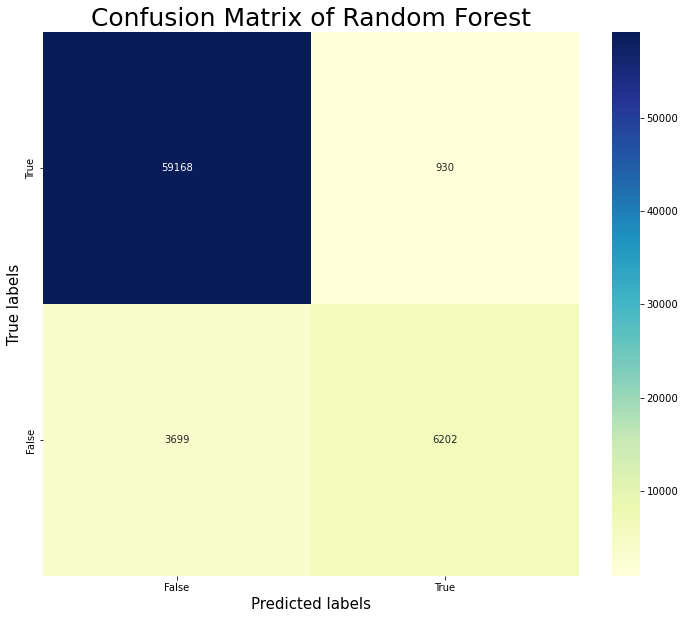

In [108]:
modelRfTuned.fit(X_train_Top20,y_train)
cal_score(x_test=X_train_Top20,y_test=y_train,model=modelRfTuned,name='Random Forest')

[[25182   680]
 [ 1759  2379]]


F1 Score: 0.9134362666924715


              precision    recall  f1-score   support

       False       0.93      0.97      0.95     25862
        True       0.78      0.57      0.66      4138

    accuracy                           0.92     30000
   macro avg       0.86      0.77      0.81     30000
weighted avg       0.91      0.92      0.91     30000



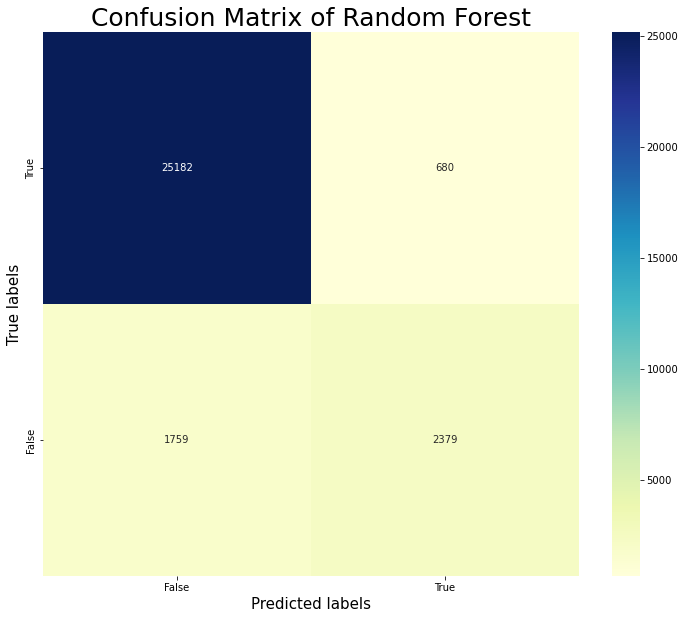

In [109]:
#calculate score on Test data
cal_score(x_test=X_test_Top20,y_test=y_test,model=modelRfTuned,name='Random Forest')

In [ ]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [ ]:
# Convert data type of Categorical Target variable
churn_filtered['churn_probability'] = churn_filtered['churn_probability'].astype('category')

top_n = 10
top_features = feature_importance.variables[0:top_n]
top_10_featues=list(top_features)
top_10_featues

### Let's visualize the top features with respect to churn probability

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['total_ic_mou_8'])

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['total_og_mou_8'])

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['total_rech_amt_8'])

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['std_og_mou_8'])

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['std_ic_mou_8'])

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['roam_ic_mou_8'])

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['roam_og_mou_8'])

In [ ]:
bivariate(churn_filtered.churn_probability, churn_filtered['arpu_8'])


<h1 style = "color : Green">Business Insights</h1>

- Needs to revise the roaming rates.The customer with high Roaming usage may find it costly. That is why their churning probability is higher as comapred to non roam users. Comapny need to provide lucrative offers to the customers who are using services in roaming zone.
